# Pymaceuticals Inc.
---

### Analysis

- There is a strong positive relationship between mouse weight and tumor volume with mice on the Capomulin regimen, as seen in the scatterplot.
- The mice on the Capomulin and Ramicane drug regimens have much smaller IQR's than the other two when looking at tumor volume, which means that there is less variability in the datapoints for mice on those regimens. 
- The dataset for mice on the Infubinol drug regimen has one potential outlier when looking at tumor volume. That outlier is in on the lower end of the dataset

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].value_counts())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicates["Mouse ID"].unique()
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = combined_df.loc[combined_df['Mouse ID'] == "g989"]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduplicated_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
deduplicated_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(deduplicated_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_group = deduplicated_df.groupby("Drug Regimen")
mean_tumor_volume = drug_regimen_group["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimen_group["Tumor Volume (mm3)"].median()
var_tumor_volume = drug_regimen_group["Tumor Volume (mm3)"].var()
std_tumor_volume = drug_regimen_group["Tumor Volume (mm3)"].std()
sem_tumor_volume = drug_regimen_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                            "Median Tumor Volume": median_tumor_volume,
                            "Tumor Volume Variance": var_tumor_volume,
                            "Tumor Volume St. Dev.": std_tumor_volume,
                            "Tumor Volume St. Err.":sem_tumor_volume
                            })
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = deduplicated_df.groupby("Drug Regimen").agg({
    'Tumor Volume (mm3)': ['mean','median','var','std','sem']
    })
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

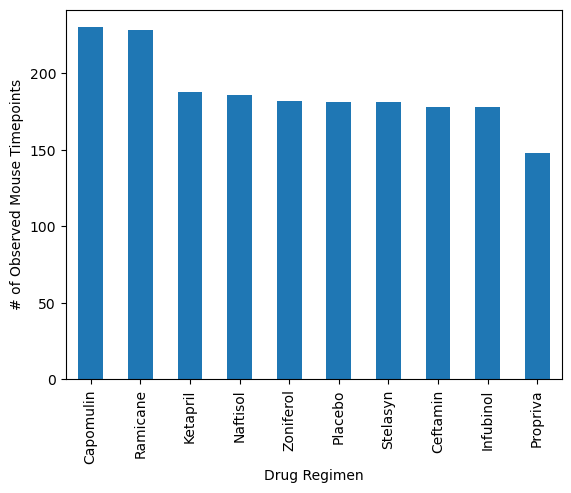

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_group = deduplicated_df.groupby("Drug Regimen")
bar_df = pd.DataFrame(bar_group["Timepoint"].count()).sort_values(by="Timepoint", ascending=False)
bar_df.plot(kind="bar", legend=False)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

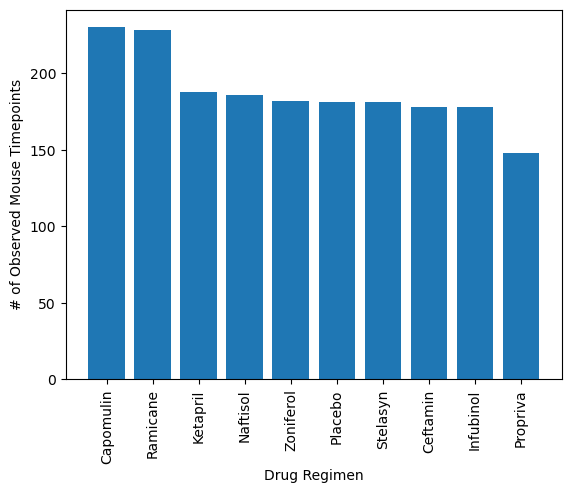

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_group = deduplicated_df.groupby("Drug Regimen")
bar_df = pd.DataFrame(bar_group["Timepoint"].count()).sort_values(by="Timepoint", ascending=False)
x_axis = bar_df.index
values = bar_df["Timepoint"]
plt.bar(x_axis, values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

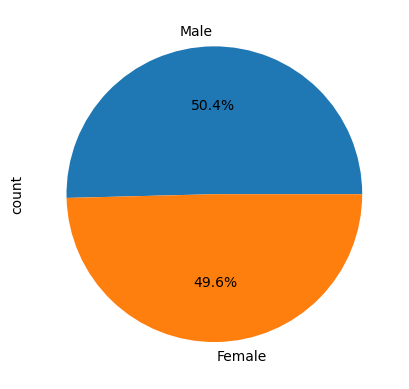

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = deduplicated_df[["Mouse ID", "Sex"]].drop_duplicates()
gender_count_df = gender_df["Sex"].value_counts()
gender_count_df

# Make the pie chart
gender_count_df.plot(kind="pie", subplots=True, autopct="%1.1f%%", legend=False)
plt.show()

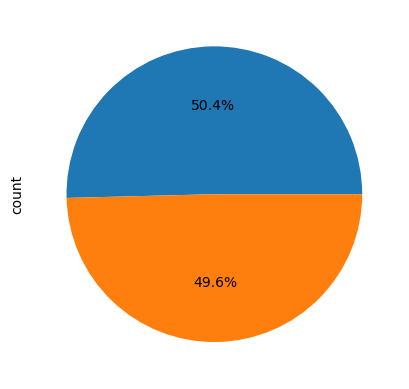

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = deduplicated_df[["Mouse ID", "Sex"]].drop_duplicates()
gender_count_df = gender_df["Sex"].value_counts()
gender_count_df

# Make the pie chart
plt.pie(gender_count_df, autopct="%1.1f%%", startangle=0)
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = deduplicated_df.groupby("Mouse ID")
last_timepoint_df = last_timepoint["Timepoint"].max().reset_index()
last_timepoint_df                                                                                                                                                                                              

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, deduplicated_df, on=["Mouse ID", "Timepoint"])
merged_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") |
                          (merged_df["Drug Regimen"] == "Ramicane") | 
                          (merged_df["Drug Regimen"] == "Infubinol") |
                           (merged_df["Drug Regimen"] == "Ceftamin")]
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = merged_df["Drug Regimen"].unique()
#treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume  = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = []
    volume_by_treatment = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume.append(volume_by_treatment)

    quartiles = volume_by_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    upper_outliers = upperq + 1.5 * iqr
    lower_outliers = lowerq - 1.5 * iqr
           
    # add subset
    for volume in volume_by_treatment:
        if volume > upper_outliers or volume < lower_outliers:
           outliers.append(volume)

    # Determine outliers using upper and lower bounds
    print(f'{treatment} potential outliers are less than {lowerq} and higher than {upperq}')

    ##this is wrong!!!!
    print(f'{treatment} potential outliers: {outliers}')

Capomulin potential outliers are less than 32.37735684 and higher than 40.1592203
Capomulin potential outliers: []
Ramicane potential outliers are less than 31.56046955 and higher than 40.65900627
Ramicane potential outliers: []
Infubinol potential outliers are less than 54.04860769 and higher than 65.52574285
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers are less than 48.72207785 and higher than 64.29983003
Ceftamin potential outliers: []


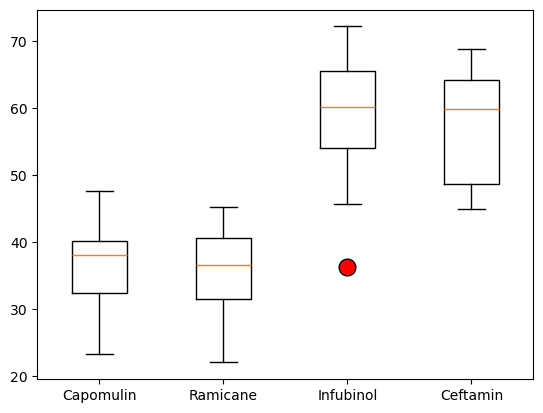

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
len(tumor_volume)
plt.boxplot(tumor_volume,tick_labels = treatments, flierprops=dict(markerfacecolor='red', marker='o', markersize = 12))
plt.show()

## Line and Scatter Plots

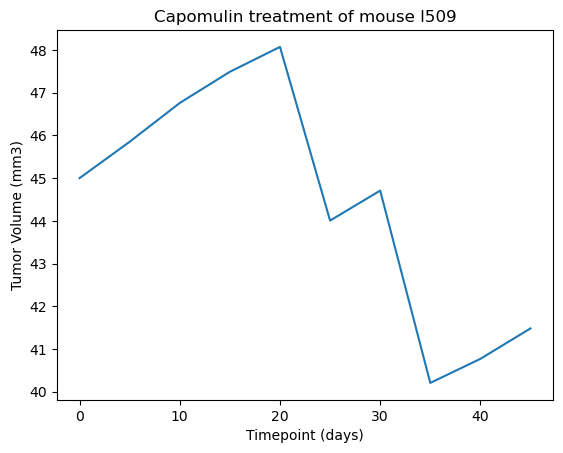

In [182]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_df = deduplicated_df[(deduplicated_df["Mouse ID"] == "l509")]
single_mouse_df
timepoint = single_mouse_df["Timepoint"]
weight = single_mouse_df["Tumor Volume (mm3)"]
plt.plot(timepoint, weight)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


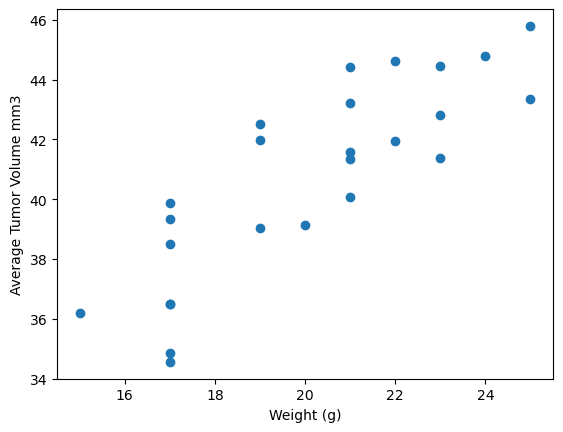

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = deduplicated_df.loc[deduplicated_df["Drug Regimen"] == "Capomulin"]
avg_tumor_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(avg_tumor_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume mm3")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


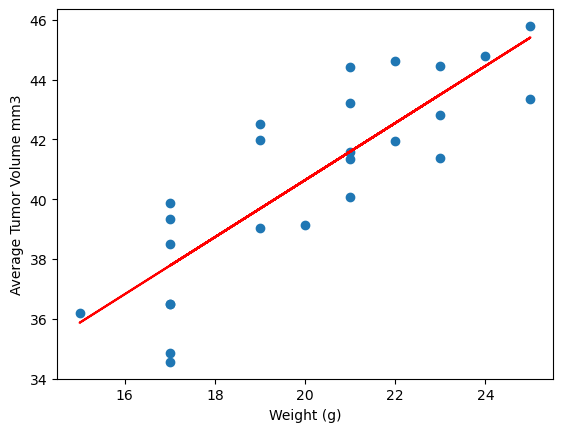

In [190]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg_tumor_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume mm3")

corr_coefficient = round(avg_tumor_weight.corr(avg_tumor_volume),2)
print(f'The correlation between mouse weight and the average tumor volume is {corr_coefficient}')
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_weight, avg_tumor_volume)
regression = slope * avg_tumor_weight + intercept
plt.plot(avg_tumor_weight,regression, color = "r")
plt.show()